# Recommender

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv('u.data', sep="\t")
columns = ['userid', 'item_id', 'rating', 'timestamp']
df.columns = columns

In [4]:
movietitles = pd.read_csv('Movie_Id_Titles')

In [5]:
df = pd.merge(df, movietitles, on='item_id')

## Make a "ratings" df

In [6]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [7]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [8]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

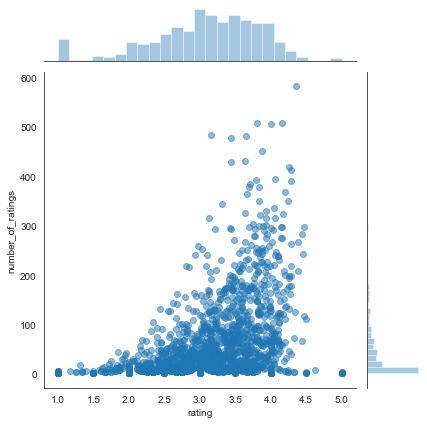

In [10]:
sns.jointplot(x="rating", y="number_of_ratings", data=ratings, alpha=0.5)

# Recommending Similar Movies

In [13]:
movie_matrix = df.pivot_table(index="userid", columns="title", values="rating")
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sort the ratings

In [14]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [15]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']

In [16]:
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']

## corrwith()

In [17]:
movie_matrix.corrwith(starwars_user_ratings)

/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [20]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

In [21]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [22]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# Remove movies with less than 100 reviews

In [23]:
corr_starwars = corr_starwars.join(ratings['number_of_ratings'])

In [24]:
corr_starwars

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


# ===== 2-03-21 Starting Over

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [15]:
# 1. Read in the data, change separator to tab
# 2. Create an array of new column names
# 3. Assign that array to our columns

df = pd.read_csv('u.data', sep="\t")
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df.columns = columns

In [16]:
df.head()

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


## OH NO! How do we know what movies these are, just by the id!?

In [17]:
# 1. Read in the item_id to movie_title df
# 2. Merge 
movietitles = pd.read_csv('Movie_Id_Titles')
df = pd.merge(df, movietitles, on="item_id")

## Ok, how do we get JUST the ratings?

In [20]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


## Ok, but, this is almost useless if only one person has rated the movie, right?

## So, we should also get number of ratings, for posterity

In [22]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

In [24]:
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# PART TWO: Now we are on to recommending similar movies

In [29]:
# 1. Make a matrix (like an excel pivot table)

In [28]:
movie_matrix = df.pivot_table(index="user_id", columns="title", values="rating")
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# 2. Pick our movies
# 3. Get the ratings for only those movies 
starwars_ratings = movie_matrix['Star Wars (1977)']
liarliar_ratings = movie_matrix['Liar Liar (1997)']

In [33]:
similar_to_starwars = movie_matrix.corrwith(starwars_ratings)

/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [36]:
corr_with_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
corr_with_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [40]:
sw_df = corr_with_starwars.join(ratings['number_of_ratings'])

In [42]:
sw_df = sw_df[sw_df['number_of_ratings'] >= 100 ]

In [44]:
sw_df = sw_df.sort_values('correlation', ascending=False)

In [45]:
sw_df

,correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Now, we're going to do the same thing with Liar Liar

1. get all Liar Liar movies
2. Get correlation
3. Get number of ratings
4. 

In [46]:
df

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"
...,...,...,...,...,...
99997,840,1674,4,891211682,Mamma Roma (1962)
99998,655,1640,3,888474646,"Eighth Day, The (1996)"
99999,655,1637,3,888984255,Girls Town (1996)
100000,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [47]:
liar_liar = df[df['title'] == 'Liar Liar (1997)']
liar_liar

,user_id,item_id,rating,timestamp,title
15648,32,294,3,883709863,Liar Liar (1997)
15649,44,294,4,883612356,Liar Liar (1997)
15650,264,294,3,886121516,Liar Liar (1997)
15651,126,294,3,887855087,Liar Liar (1997)
15652,276,294,4,874786366,Liar Liar (1997)
...,...,...,...,...,...
16128,599,294,4,880951113,Liar Liar (1997)
16129,804,294,5,879441099,Liar Liar (1997)
16130,867,294,3,880077831,Liar Liar (1997)
16131,734,294,1,891025891,Liar Liar (1997)


In [48]:
df_matrix = df.pivot_table(index="user_id", columns="title", values="rating")
df_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_m_sw = df_matrix['Star Wars (1977)']

In [53]:
df_m_sw_corr = df_matrix.corrwith(df_m_sw)

In [55]:
df_m_sw_corr = pd.DataFrame(df_m_sw_corr, columns=['correlation'])
df_m_sw_corr

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [58]:
df_m_sw_corr_with_ratings = df_m_sw_corr.join(ratings)

In [59]:
df_m_sw_corr_with_ratings

,correlation,rating,number_of_ratings
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41
...,...,...,...
Young Guns II (1990),0.228615,2.772727,44
"Young Poisoner's Handbook, The (1995)",-0.007374,3.341463,41
Zeus and Roxanne (1997),0.818182,2.166667,6


In [60]:
df_m_sw_corr_with_ratings = df_m_sw_corr_with_ratings[df_m_sw_corr_with_ratings['number_of_ratings'] >= 100]

In [61]:
df_m_sw_corr_with_ratings.sort_values('correlation',ascending=False)

,correlation,rating,number_of_ratings
title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.206522,368
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
...,...,...,...
"Edge, The (1997)",-0.127167,3.539823,113
As Good As It Gets (1997),-0.130466,4.196429,112
Crash (1996),-0.148507,2.546875,128


## NOW with Liar Liar

In [81]:
# 1. Make a matrix 
df_matrix = df.pivot_table(index="user_id", columns="title", values="rating")
# 2. Get JUST Liar Liar  
df_matrix_ll = df_matrix['Liar Liar (1997)']
# 3. Compare everything in the matrix to Liar Liar column
df_matrix_ll_corr = df_matrix.corrwith(df_matrix_ll)
# 4. Turn that into a df so we can add things like 'ratings'
df_matrix_ll_corr_df = pd.DataFrame(df_matrix_ll_corr, columns=['correlation'])
# 5. Using a join (because our index -- title -- is the same for both dfs, add ratings)
df_matrix_ll_corr_df_with_ratings = df_matrix_ll_corr_df.join(ratings)
# 6. Remove anything with number of ratings < 100
df_matrix_ll_corr_df_with_ratings = df_matrix_ll_corr_df_with_ratings[df_matrix_ll_corr_df_with_ratings
                                                                      ['number_of_ratings'] >= 100]
# 7. Sort
df_matrix_ll_corr_df_with_ratings_sorted = df_matrix_ll_corr_df_with_ratings.sort_values('correlation', 
                                                                                         ascending=False)

/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [82]:
df_matrix_ll_corr_df_with_ratings_sorted

,correlation,rating,number_of_ratings
title,,,
Liar Liar (1997),1.000000,3.156701,485
Batman Forever (1995),0.516968,2.666667,114
"Mask, The (1994)",0.484650,3.193798,129
Down Periscope (1996),0.472681,2.702970,101
Con Air (1997),0.469828,3.459854,137
...,...,...,...
Hoop Dreams (1994),-0.184503,4.094017,117
Ed Wood (1994),-0.199481,3.601504,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,4.252577,194


In [78]:
# IN SHORT
dfm = df.pivot_table(index="user_id", columns="title", values="rating")
ll = dfm['Liar Liar (1997)']
dfm_ll = pd.DataFrame(dfm.corrwith(ll), columns=['correlation'])
dfm_ll = dfm_ll.join(ratings)
dfm_ll = dfm_ll[dfm_ll['number_of_ratings'] >= 100].sort_values('correlation', ascending=False)
dfm_ll

/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/kendraryan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,rating,number_of_ratings
title,,,
Liar Liar (1997),1.000000,3.156701,485
Batman Forever (1995),0.516968,2.666667,114
"Mask, The (1994)",0.484650,3.193798,129
Down Periscope (1996),0.472681,2.702970,101
Con Air (1997),0.469828,3.459854,137
...,...,...,...
Hoop Dreams (1994),-0.184503,4.094017,117
Ed Wood (1994),-0.199481,3.601504,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,4.252577,194
